<a href="https://colab.research.google.com/github/sharique2903/-LGMVIP-DataScience-TaskNumber/blob/main/Task_3_(Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

**Load And Processes Data**

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')  # Load stock market data
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale data to range [0, 1]
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

**Split Data Into Training And Testing Datasets**

In [34]:
training_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:training_size], scaled_data[training_size:]

**Function To Create Sequences Of Data**

In [24]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

**Define Sequence Length And Create Sequences**

In [25]:
seq_length = 10  # Length of input sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

**Build The LSTM Model**

In [26]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

**Compile The Model**

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

**Train The Model**

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51/51 [==============================] - 3s 7ms/step - loss: 0.0214
Epoch 2/10
51/51 [==============================] - 0s 8ms/step - loss: 9.2122e-04
Epoch 3/10
51/51 [==============================] - 0s 8ms/step - loss: 8.7023e-04
Epoch 4/10
51/51 [==============================] - 0s 8ms/step - loss: 8.7308e-04
Epoch 5/10
51/51 [==============================] - 0s 8ms/step - loss: 8.1571e-04
Epoch 6/10
51/51 [==============================] - 1s 11ms/step - loss: 7.8739e-04
Epoch 7/10
51/51 [==============================] - 1s 12ms/step - loss: 8.2268e-04
Epoch 8/10
51/51 [==============================] - 0s 8ms/step - loss: 7.5005e-04
Epoch 9/10
51/51 [==============================] - 0s 7ms/step - loss: 7.2288e-04
Epoch 10/10
51/51 [==============================] - 0s 7ms/step - loss: 7.1783e-04


**Evaluate The Model**

In [29]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

13/13 [==============================] - 1s 3ms/step - loss: 3.8813e-04
Test loss: 0.00038812559796497226


**Predict Future Stock Prices**

In [30]:
predictions = model.predict(X_test)

13/13 [==============================] - 1s 3ms/step


**Inverse Scale The Predictions**

In [31]:
predictions = scaler.inverse_transform(predictions)

**# Plot The Predictions Against The Actual Data**

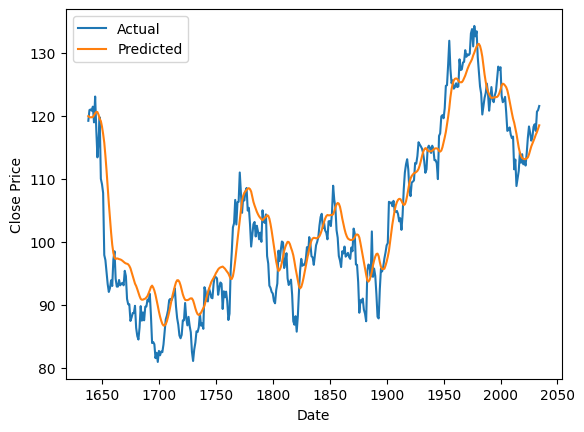

In [32]:
import matplotlib.pyplot as plt
plt.plot(data.index[training_size+seq_length:], data['Close'][training_size+seq_length:], label='Actual')
plt.plot(data.index[training_size+seq_length:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()